<a href="https://colab.research.google.com/github/Darshanajayreddy/-Business-Analyst-Portfolio/blob/main/E_commerce_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Step 1: Loading Data ---
Data loaded successfully with latin-1 encoding.

Initial DataFrame head:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (to

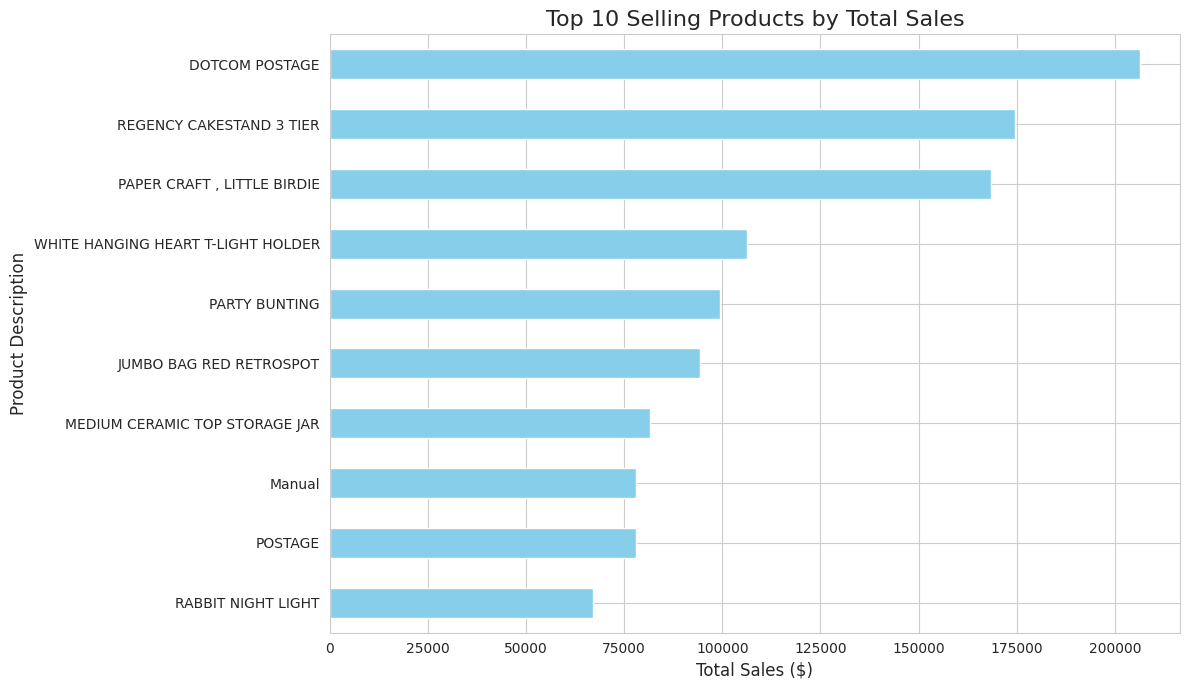

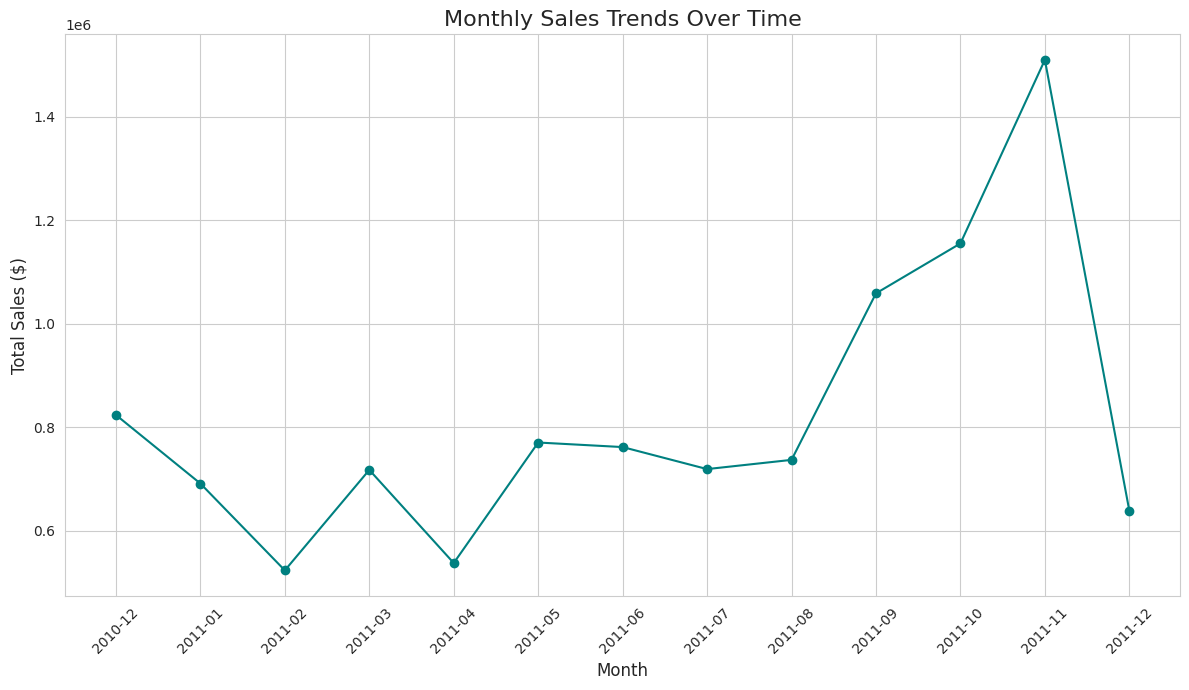

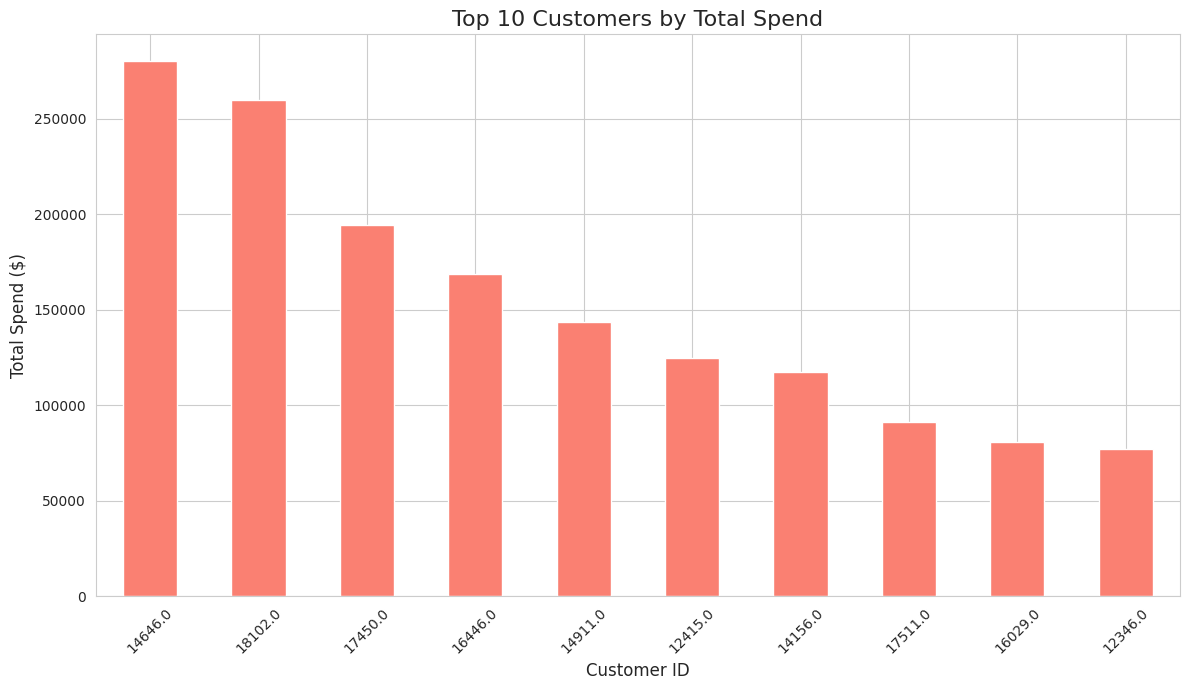

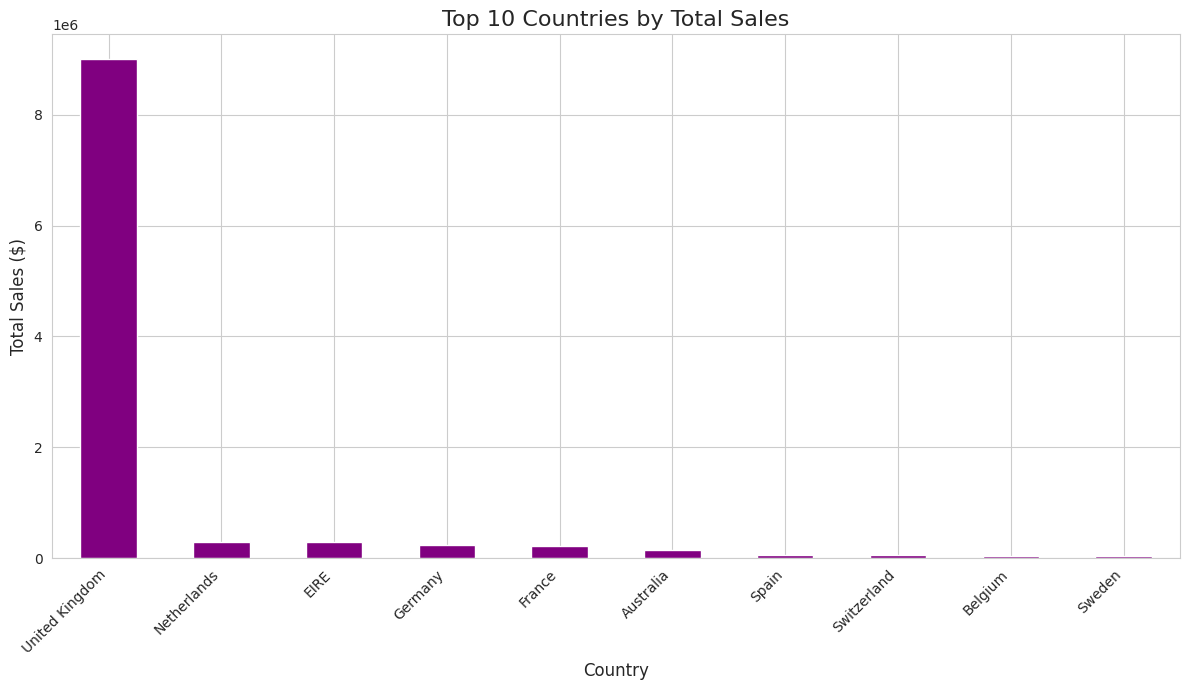


--- Step 5: Summary of Findings ---

Based on the analysis, here are the key insights:
1. **Top Products:** The most significant revenue drivers are: DOTCOM POSTAGE, REGENCY CAKESTAND 3 TIER, PAPER CRAFT , LITTLE BIRDIE.
   - **Actionable Recommendation:** Ensure these products are always in stock and consider creating product bundles with them to boost average order value.
2. **Sales Trends:** Sales show a clear seasonal pattern, with peak performance in 2011-11.
   - **Actionable Recommendation:** Plan marketing campaigns and inventory levels to capitalize on these seasonal peaks. You could run a 'Christmas in July' sale if that's a key period.
3. **Customer Value:** The top customer spent an impressive $280206.02.
   - **Actionable Recommendation:** Implement a VIP loyalty program or send personalized thank-you offers to retain these high-value customers.
4. **Geographic Focus:** The top country by sales is United Kingdom.
   - **Actionable Recommendation:** Consider running geo-ta

In [1]:
# A Business Analyst's Toolkit for E-commerce Data Analysis
# This script performs data cleaning, analysis, and visualization
# to extract key business insights from an e-commerce dataset.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Loading and Initial Exploration ---
file_path = '/content/OnlineRetail.csv'

try:
    # Attempt to read the file with a few common encodings
    df = pd.read_csv(file_path, encoding='utf-8')
    print("Data loaded successfully with utf-8 encoding.")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
        print("Data loaded successfully with latin-1 encoding.")
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
        print("Data loaded successfully with ISO-8859-1 encoding.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    exit()

# Display the first few rows and basic information about the dataset
print("\nInitial DataFrame head:")
print(df.head())
print("\nDataFrame info:")
print(df.info())

# --- 2. Data Cleaning and Preprocessing ---
print("\n--- Step 2: Data Cleaning ---")
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop rows where critical columns have missing values.
# The `Description` column has some missing values, but we can still analyze sales without it.
# However, for top-selling products we need it, so we'll drop NaNs from it.
df.dropna(subset=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'InvoiceDate'], inplace=True)

# Data type conversion
# Convert 'InvoiceDate' to a datetime object for time-series analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Ensure 'Quantity' and 'UnitPrice' are numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Drop any rows that became NaN after the conversion
df.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Remove rows with negative quantities, which are likely canceled orders
df = df[df['Quantity'] > 0]

# Calculate total sales for each order item
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

print("\nDataFrame after cleaning and preprocessing:")
print(df.head())
print("\nDataFrame info after cleaning:")
print(df.info())

# --- 3. Business Analysis & Insights ---
print("\n--- Step 3: Performing Analysis ---")

# Insight 1: Top-Selling Products
# Group by Description and sum total sales to find top performers
top_selling_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
print("\nTop 10 Selling Products by Total Sales:")
print(top_selling_products.head(10))

# Insight 2: Sales Trends Over Time (e.g., monthly)
# Extract year and month from InvoiceDate to analyze trends
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalSales'].sum()
print("\nMonthly Sales Trends:")
print(monthly_sales)

# Insight 3: Customer Segmentation (e.g., Top Spenders)
# Group by CustomerID and sum their total spend
customer_spend = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
print("\nTop 10 Customers by Total Spend:")
print(customer_spend.head(10))

# Insight 4: Geographic Sales Performance
# Group by Country and sum total sales
geographic_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print("\nTop 5 Countries by Total Sales:")
print(geographic_sales.head(5))

# --- 4. Data Visualization ---
print("\n--- Step 4: Visualizing Insights ---")

# Set a professional plotting style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-deep')

# Visualization 1: Top 10 Selling Products
plt.figure(figsize=(12, 7))
top_selling_products.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

# Visualization 2: Monthly Sales Trends
plt.figure(figsize=(12, 7))
monthly_sales.index = monthly_sales.index.astype(str) # Convert PeriodIndex to string for plotting
plt.plot(monthly_sales, marker='o', linestyle='-', color='teal')
plt.title('Monthly Sales Trends Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 3: Top 10 Customers
plt.figure(figsize=(12, 7))
customer_spend.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Customers by Total Spend', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 4: Geographic Sales
plt.figure(figsize=(12, 7))
geographic_sales.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 5. Summary and Actionable Recommendations ---
print("\n--- Step 5: Summary of Findings ---")
print("\nBased on the analysis, here are the key insights:")
print(f"1. **Top Products:** The most significant revenue drivers are: {', '.join(top_selling_products.head(3).index)}.")
print("   - **Actionable Recommendation:** Ensure these products are always in stock and consider creating product bundles with them to boost average order value.")
print(f"2. **Sales Trends:** Sales show a clear seasonal pattern, with peak performance in {monthly_sales.idxmax()}.")
print("   - **Actionable Recommendation:** Plan marketing campaigns and inventory levels to capitalize on these seasonal peaks. You could run a 'Christmas in July' sale if that's a key period.")
print(f"3. **Customer Value:** The top customer spent an impressive ${customer_spend.iloc[0]:.2f}.")
print("   - **Actionable Recommendation:** Implement a VIP loyalty program or send personalized thank-you offers to retain these high-value customers.")
print(f"4. **Geographic Focus:** The top country by sales is {geographic_sales.idxmax()}.")
print("   - **Actionable Recommendation:** Consider running geo-targeted ad campaigns in high-performing regions to attract new customers and strengthen your presence.")

